<a href="https://colab.research.google.com/github/ARUNIMO/Diabetes_ML_Models_LazyNotebook/blob/main/Diab_ML_Analysis_LazyNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # library for making statistical graphics in Python.
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.colors as colors

In [2]:
# Importing Data

In [3]:
from google.colab import files

upload_file = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
data = pd.read_csv('diabetes.csv')

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
print('Number of Rows :',data.shape[0])
print('Number of Columns :',data.shape[1])

Number of Rows : 768
Number of Columns : 9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Checking for missing values

In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#0 missing values in each column.

In [10]:
#Exploratory Data Analysis (EDA)

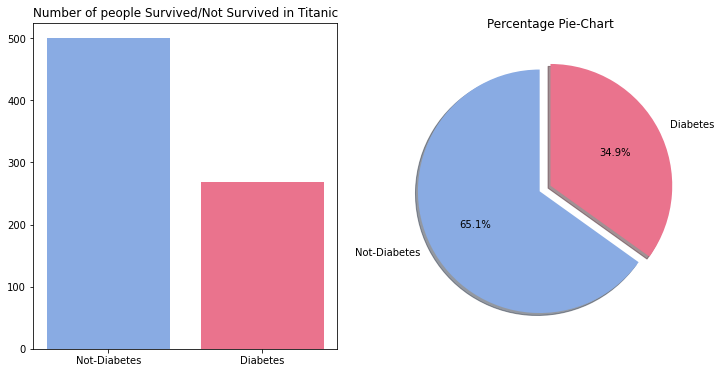

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6)) 


count = data['Outcome'].value_counts()
perc  = (count/len(data))*100


labels = ['Not-Diabetes','Diabetes']
colors = ['#89ABE3FF','#EA738DFF']
bsizes = [count[0],count[1]]
sizes = [perc[0],perc[1]]

ax1.bar(labels,bsizes,label=labels, color=colors)
ax1.title.set_text('Number of people Survived/Not Survived in Titanic')
#ax1.bar_label(ax1.containers[0])


explode = (0.1, 0)  
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,colors = colors)
ax2.title.set_text('Percentage Pie-Chart')


In [14]:
#Pregnancies
#Number of times pregnant

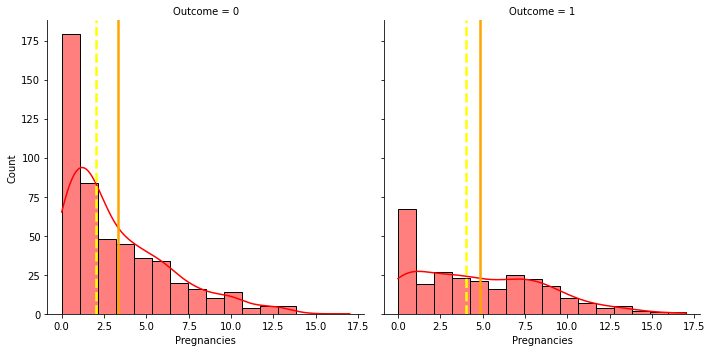

In [15]:
Pregnancies1 = data

g = sns.displot(data = Pregnancies1, x="Pregnancies", col="Outcome", kde=True,color='red')
    

for (row, col, hue_idx), Pregnancies1 in g.facet_data():
 
    # Get the ax for `row` and `col`
    ax = g.facet_axis(row, col)
    # Set the `vline`s using the var `x_var`
    ax.axvline(Pregnancies1['Pregnancies'].mean(), c="orange", ls="-", lw=2.5)
    ax.axvline(Pregnancies1['Pregnancies'].median(), c="yellow", ls="--", lw=2.5)

In [16]:
#At a first glance we notice that the mean and median in pregnant women who diagnosed with diabetes (Outcome = 1) is greater than those without diabetes.



In [17]:
#Glucose
#Glucose level is a measure of your blood sugar after an overnight fast (not eating).

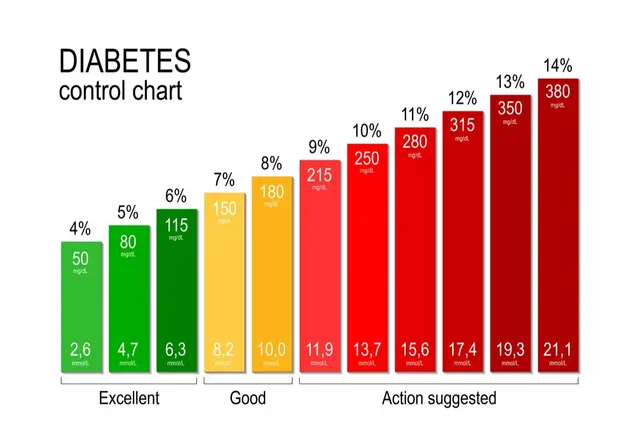

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

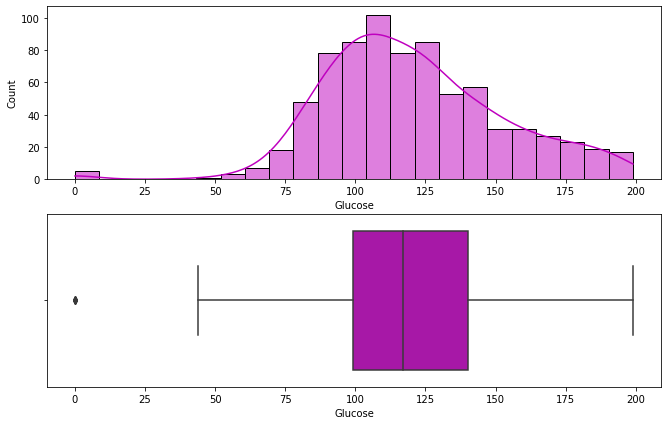

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(11,7)) 

Glucose1 = data

sns.histplot(Glucose1, x="Glucose", kde=True,color='m',ax=ax1)
sns.boxplot(x=Glucose1["Glucose"],color='m',ax=ax2)

Glucose1['Glucose'].describe()

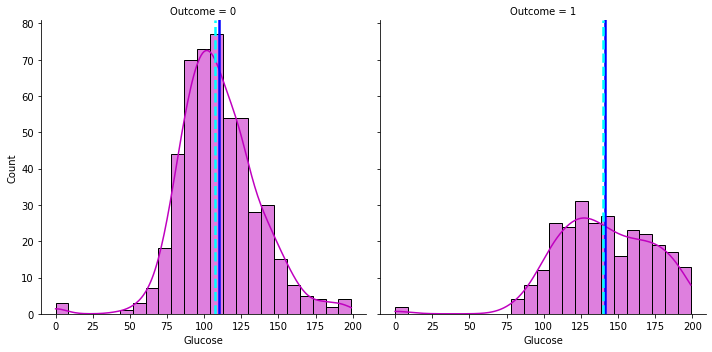

In [19]:
g = sns.displot(Glucose1, x="Glucose", col="Outcome", kde=True,color='m')
    

for (row, col, hue_idx), Glucose1 in g.facet_data():
 
    # Get the ax for `row` and `col`
    ax = g.facet_axis(row, col)
    # Set the `vline`s using the var `x_var`
    ax.axvline(Glucose1['Glucose'].mean(), c="b", ls="-", lw=2.5)
    ax.axvline(Glucose1['Glucose'].median(), c="cyan", ls="--", lw=2.5)

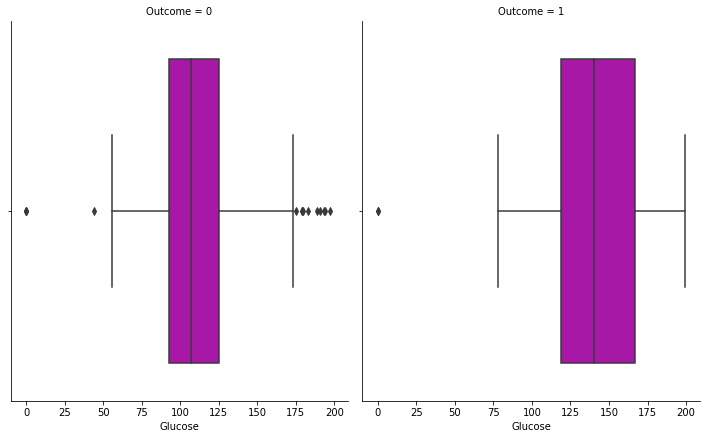

In [20]:
Glucose1 = data

sns.catplot(
    kind = "box",
    x = "Glucose",
    col = "Outcome",
    data = Glucose1,
    height = 6.2,
    aspect = .8,
    color='m'
)

In [21]:
#We can see the people who diagnosed with diabetes have extremly different glucose level.

In [22]:
#BloodPressure
#Diastolic Blood Pressure

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

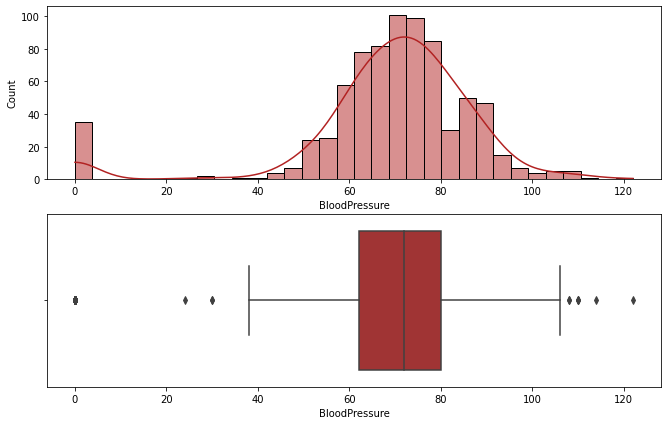

In [23]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(11,7)) 

BloodPressure1 = data

sns.histplot(BloodPressure1, x="BloodPressure", kde=True,color='firebrick',ax=ax1)
sns.boxplot(x=BloodPressure1["BloodPressure"],color='firebrick',ax=ax2)

BloodPressure1['BloodPressure'].describe()

In [24]:
#SkinThickness
#Triceps skin fold thickness (mm)

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

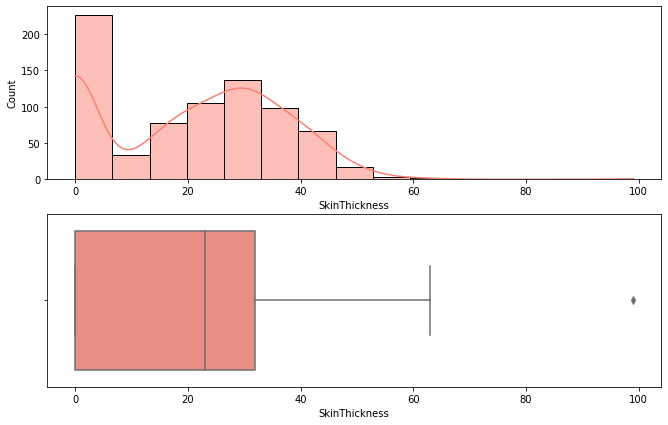

In [25]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(11,7)) 

SkinThickness1 = data

sns.histplot(SkinThickness1, x="SkinThickness", kde=True,color='salmon',ax=ax1)
sns.boxplot(x=SkinThickness1["SkinThickness"],color='salmon',ax=ax2)

SkinThickness1['SkinThickness'].describe()

In [26]:
#Insulin

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

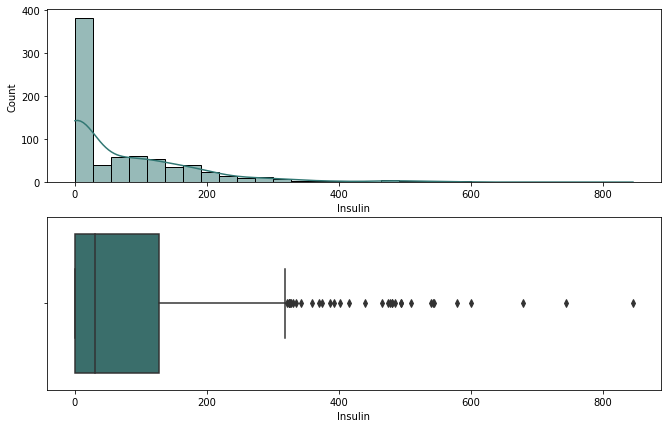

In [27]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(11,7)) 

Insulin1 = data

sns.histplot(Insulin1, x="Insulin", kde=True,color='#317773',ax=ax1)
sns.boxplot(x=Insulin1["Insulin"],color='#317773',ax=ax2)

Insulin1['Insulin'].describe()

In [28]:
#We will Drop the Insulin Column because more than the 50 % observation is 0

In [29]:
#Body Mass Index (BMI)

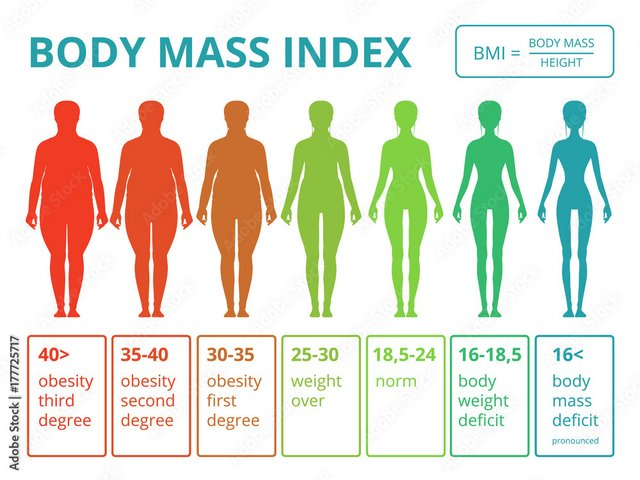

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

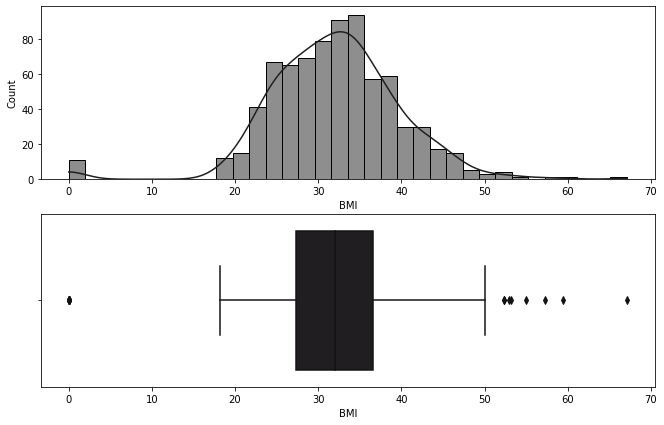

In [30]:
ig, (ax1,ax2) = plt.subplots(2,1, figsize=(11,7)) 

BMI1 = data

sns.histplot(BMI1, x="BMI", kde=True,color='#201E20',ax=ax1)
sns.boxplot(x=BMI1["BMI"],color='#201E20',ax=ax2)

BMI1['BMI'].describe()

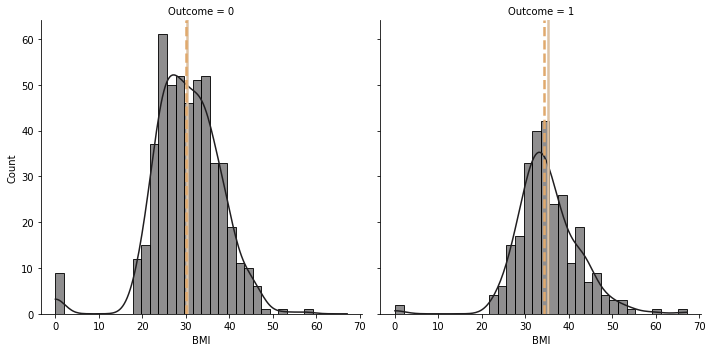

In [31]:
g = sns.displot(BMI1, x="BMI", col="Outcome", kde=True,color='#201E20')
    

for (row, col, hue_idx), BMI1 in g.facet_data():
 
    # Get the ax for `row` and `col`
    ax = g.facet_axis(row, col)
    # Set the `vline`s using the var `x_var`
    ax.axvline(BMI1['BMI'].mean(), c="#DDC3A5", ls="-", lw=2.5)
    ax.axvline(BMI1['BMI'].median(), c="#E0A96D", ls="--", lw=2.5)

In [32]:
#DiabetesPedigreeFunction

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

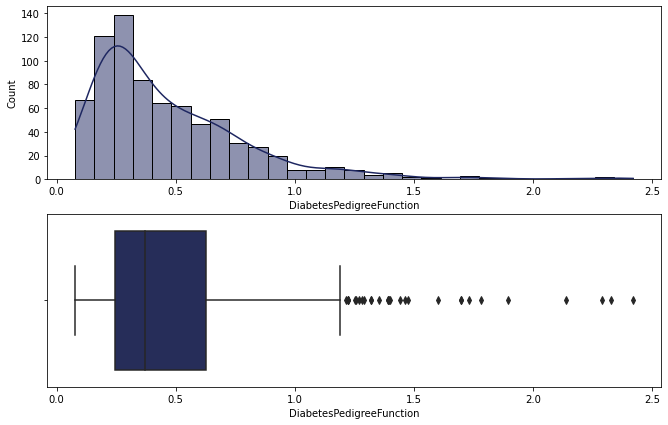

In [33]:
ig, (ax1,ax2) = plt.subplots(2,1, figsize=(11,7)) 

DiabetesPedigreeFunction1 = data

sns.histplot(DiabetesPedigreeFunction1, x="DiabetesPedigreeFunction", kde=True,color='#1E2761',ax=ax1)
sns.boxplot(x=DiabetesPedigreeFunction1["DiabetesPedigreeFunction"],color='#1E2761',ax=ax2)

DiabetesPedigreeFunction1['DiabetesPedigreeFunction'].describe()

In [34]:
#Age

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

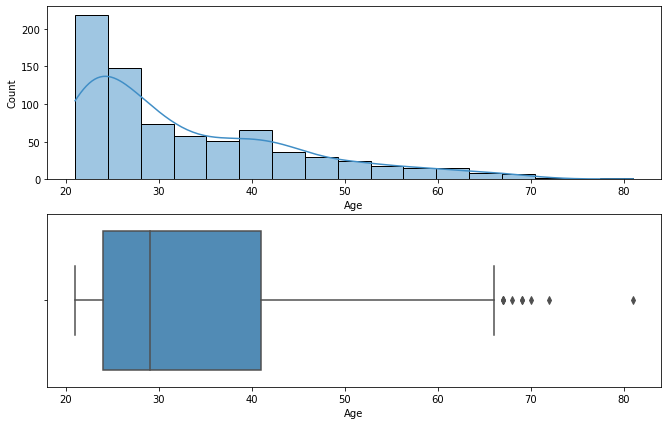

In [35]:
ig, (ax1,ax2) = plt.subplots(2,1, figsize=(11,7)) 

Age1 = data

sns.histplot(Age1, x="Age", kde=True,color='#408EC6',ax=ax1)
sns.boxplot(x=Age1["Age"],color='#408EC6',ax=ax2)

Age1['Age'].describe()

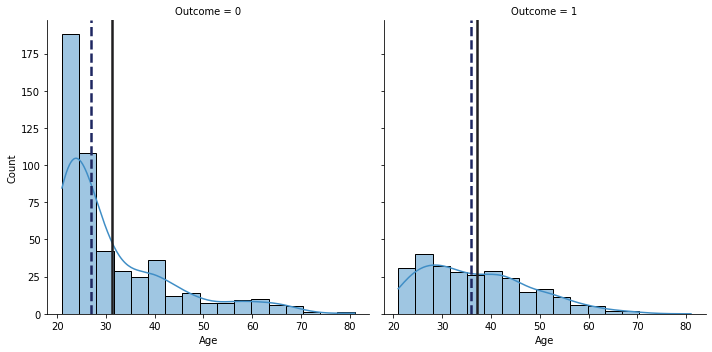

In [36]:
g = sns.displot(Age1, x="Age", col="Outcome", kde=True,color='#408EC6')
    

for (row, col, hue_idx), Age1 in g.facet_data():
 
    # Get the ax for `row` and `col`
    ax = g.facet_axis(row, col)
    # Set the `vline`s using the var `x_var`
    ax.axvline(Age1['Age'].mean(), c="#201E20", ls="-", lw=2.5)
    ax.axvline(Age1['Age'].median(), c="#1E2761", ls="--", lw=2.5)

In [37]:
#Data Processing


In [38]:
#Dropping Insulin and SkinThickness columns because there are many zeros in columns

In [39]:
data = data.drop(columns = ['Insulin'])
data = data.drop(columns = ['SkinThickness'])

In [40]:
#Replace zero's values with the mean in Glucose,BloodPressure and BMI columns

In [41]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

data

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [42]:
data.corr().style.background_gradient(cmap='rocket') 

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.281231,0.000371,0.326740,0.162986
BMI,0.021546,0.231478,0.281231,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.312254,0.173844,0.238356,1.000000


In [43]:
X = data[['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']]
y = data[['Outcome']].values.ravel()

In [44]:
#Oversampling
#Oversampling our target variable

In [45]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print(Counter(y))

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X,y = oversample.fit_resample(X, y)

# summarize class distribution
print(Counter(y))

Counter({0: 500, 1: 268})
Counter({1: 500, 0: 500})


In [46]:
#Feature Scaling

In [47]:
from sklearn.preprocessing import RobustScaler 
trans = RobustScaler ()
X = trans.fit_transform(X)

In [48]:
#Data splitting

In [49]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X,y ,test_size=0.20, random_state=42)

print('x_train:',x_train.shape,'x_test:',x_test.shape)    
print('y_train:',y_train.shape,'y_test:',y_test.shape)

x_train: (800, 6) x_test: (200, 6)
y_train: (800,) y_test: (200,)


In [50]:
#Predictive Modeling

In [51]:
! pip install lazypredict
from lazypredict.Supervised import LazyClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:03<00:00,  9.55it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.87,0.87,0.87,0.87,0.46
BaggingClassifier,0.84,0.84,0.84,0.84,0.09
RandomForestClassifier,0.84,0.84,0.84,0.84,0.48
LGBMClassifier,0.83,0.83,0.83,0.83,0.21
LabelSpreading,0.82,0.82,0.82,0.82,0.12
LabelPropagation,0.82,0.82,0.82,0.82,0.10
XGBClassifier,0.80,0.79,0.79,0.79,0.23
ExtraTreeClassifier,0.78,0.78,0.78,0.78,0.02
LogisticRegression,0.77,0.77,0.77,0.77,0.03


In [53]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [54]:
#Cross-Validation

In [55]:
#We are taking the top 5 Models for C-Validation

In [56]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['ExtraTreesClassifier','RandomForestClassifier','DecisionTreeClassifier','BaggingClassifier','XGBClassifier']
models=[ExtraTreesClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),BaggingClassifier(),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


,CV Mean,Std
ExtraTreesClassifier,0.85,0.04
RandomForestClassifier,0.84,0.04
DecisionTreeClassifier,0.80,0.03
BaggingClassifier,0.84,0.06
XGBClassifier,0.80,0.03


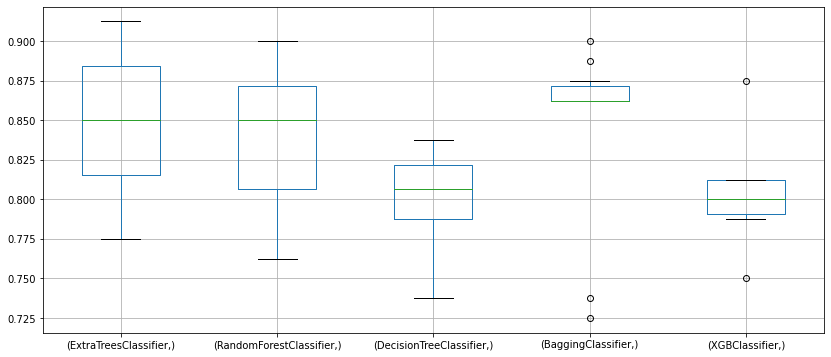

In [57]:
plt.subplots(figsize=(14,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

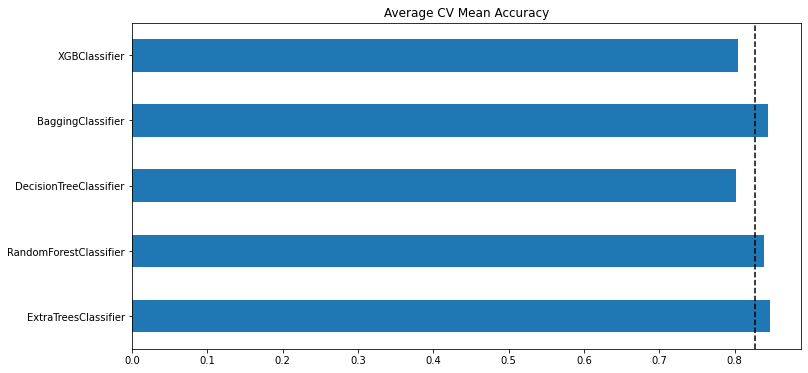

In [58]:
plt.subplots(figsize=(12,6))

new_models_dataframe2['CV Mean'].plot.barh()
plt.axvline(x=sum(new_models_dataframe2['CV Mean'])/len(new_models_dataframe2['CV Mean']), color='black',linestyle ='--' ,label='axvline - full height')
plt.title('Average CV Mean Accuracy')

plt.show()

In [59]:
#ExtraTreesClassifier

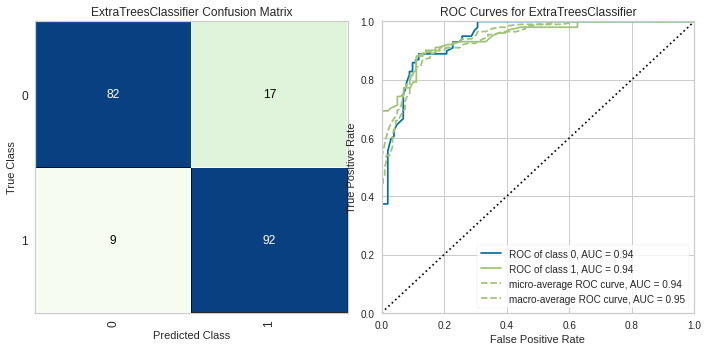

In [60]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

model = ExtraTreesClassifier()
visualgrid = [
    ConfusionMatrix(model,ax=ax1,cmap="GnBu"),
    ROCAUC(model, ax=ax2),
]

for viz in visualgrid:
    viz.fit(x_train,y_train)
    viz.score(x_test,y_test)
    viz.finalize()


In [61]:
#RandomForestClassifier

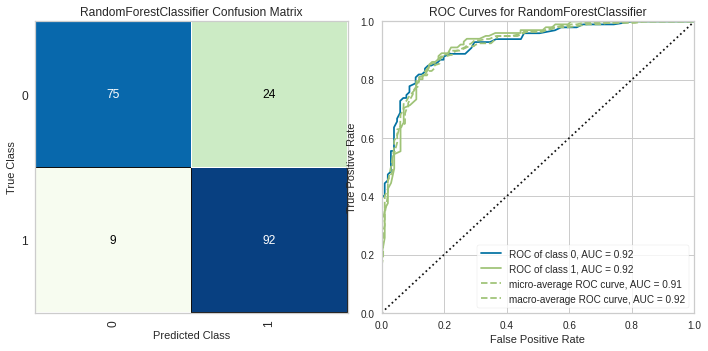

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

model = RandomForestClassifier()
visualgrid = [
    ConfusionMatrix(model,ax=ax1,cmap="GnBu"),
    ROCAUC(model, ax=ax2),
]

for viz in visualgrid:
    viz.fit(x_train,y_train)
    viz.score(x_test,y_test)
    viz.finalize()

In [63]:
#DecisionTreeClassifier

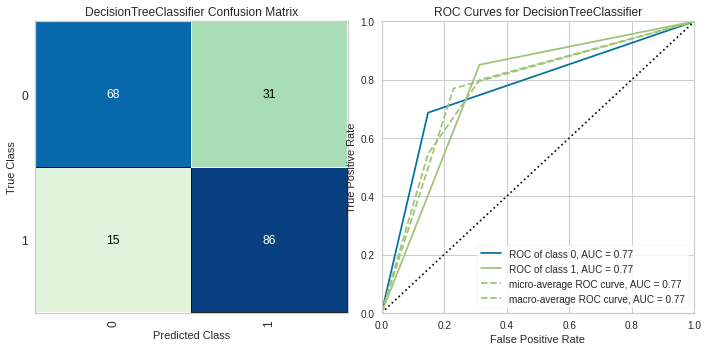

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

model = DecisionTreeClassifier()
visualgrid = [
    ConfusionMatrix(model,ax=ax1,cmap="GnBu"),
    ROCAUC(model, ax=ax2),
]

for viz in visualgrid:
    viz.fit(x_train,y_train)
    viz.score(x_test,y_test)
    viz.finalize()


In [65]:
#BaggingClassifier

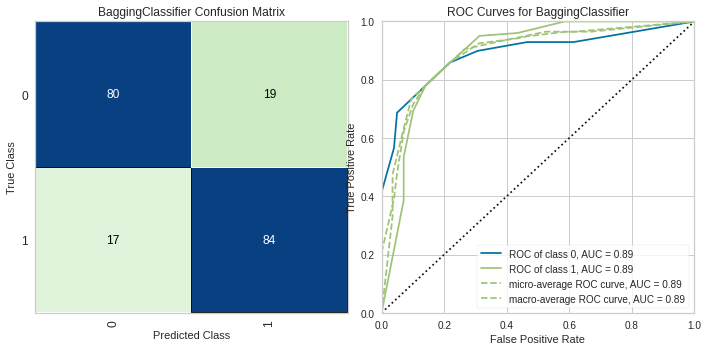

In [66]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

model = BaggingClassifier()
visualgrid = [
    ConfusionMatrix(model,ax=ax1,cmap="GnBu"),
    ROCAUC(model, ax=ax2),
]

for viz in visualgrid:
    viz.fit(x_train,y_train)
    viz.score(x_test,y_test)
    viz.finalize()

In [67]:
#XGBClassifier

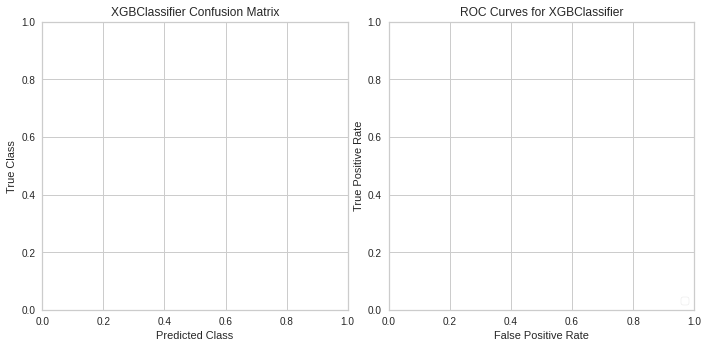

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

model = XGBClassifier()
visualgrid = [
    ConfusionMatrix(model,ax=ax1,cmap="GnBu"),
    ROCAUC(model, ax=ax2),
]

for viz in visualgrid:
    viz.fit(x_train,y_train)
    #viz.score(x_test,y_test)
    viz.finalize()